<a href="https://colab.research.google.com/github/nickwotton/MQP2019/blob/master/Nick/BSM_formula_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BSM formula

## Abstract

- create GBM class
- define a method for BSM formula for a given option type
- consider possible relationships between parameters and call option price

## Analysis

BS model assumes the distribution of stock as lognormal. In particular, it writes 
$$\ln \frac{S(T)}{S(0)} \sim \mathcal N((r  - \frac 1 2 \sigma^2) T, \sigma^2 T)$$
with respect to risk neutral measure. In the above, the parameters stand for

* $S(0)$: The initial stock price
* $S(T)$: The stock price at $T$
* $r$: interest rate
* $\sigma$: volatility




The call and put price with maturity $T$ and strike price $K$ will be known as $C_0$ and $P_0$ given as below:
$$C_0 = \mathbb E [e^{-rT} (S(T) - K)^+] = S_0  \Phi(d_1) - K e^{-rT} \Phi(d_2),$$
and 
$$P_0 = \mathbb E [e^{-rT} (S(T) - K)^-] = K e^{-rT} \Phi(- d_2) - S_0  \Phi(- d_1),$$
where $d_i$ are given as
$$d_1 = \frac{1}{\sigma\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r + \frac{\sigma^2}{2}
          \right)
          \left(
            T-t
          \right)
        \right],$$
and
$$d_2 = \frac{1}{\sigma\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r - \frac{\sigma^2}{2}
          \right)
          \left(
            T-t
          \right)
        \right] = d_{1}-\sigma\sqrt{\left( T - t \right)}$$

<p align="center"><font size="-2">(From $\textit{Stochastic Calculus for Finance II Continuous Time Models}$ by Shreve)</font></p>
and $\Phi$ is the CDF of the Standard Normal Distribution:
$$\Phi(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{t^2}{2}}dt$$

Put-call parity will be useful:
    $$C_0 - P_0 =  S(0) - e^{-rT} K.$$


## BSM Formula and Option Pricing

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

We reload the european option class created before.

In [0]:
'''=========
option class init
=========='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype               # Put or Call
      self.strike = strike             # Strike K
      self.maturity = maturity         # Maturity T
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return np.max([0, (s - k)*otype])

Observe the defined Payoff function above. Mathemtacially, we have the Payoff for an option at time $t$ is:

Call Options:
$P_{Call}(t)=max\{0, S_{t} - K\}$

Put Options:
$P_{Put}(t)=max\{0, K-S_{t}\}$

Graphically, we have the payoffs for Call and Put respectively:

![European Call Option Payoff](https://drive.google.com/uc?id=1ZJfxv17b_nfhOegJmGdeydvz1xfGgezI) 
![European Put Option Payoff](https://drive.google.com/uc?id=1zLRjiHym9md5QBQbrpalZM3TosrADAbh)

For the Call Option, this means that if at expiry time $T$ the price of the stock is below or equal to $K$, the holder will not exercise it, thus, their Payoff is $\$0$. However, if at expiry the price of the stock is greater than $K$, the holder does exercise the option, thus their Payoff is equal to the difference between $S_T$ and $K$. For example, for a strike price $K = \$110$, if the stock price at time $T$ is 
- $\$100$, the holder makes $\$0$ since $K\geq\$100$.
- $\$120$, the holder makes $S_T-K=\$120-\$110=\$10$

However, for the Put option, at expiry $T$ the holder only exercises the option if the price of the stock, $S_T$ is less than $K$. In that case, their Payoff is equal to the difference between $K$ and $S_T$. If the price of the stock is greater than $K$, then the holder does not exercise the stock, thus making $\$0$. Again, for example, for a strike price $K=\$110$, if the stock price at time $T$ is 
- $\$100$, the holder makes $\$110-\$100=\$10$
- $\$120$, the holder makes $\$0$ since $K\leq\$120$

Next, we create the Geometric Brownian Motion (gbm) class, which is 
determined by three parameters. We shall initialize it
as it  is created.

In [0]:
'''============
Gbm class inherited from sde_1d
============='''

class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

The BSM formula is given by a method of the Gbm class with an input of an option.

In [0]:
'''========
Black-Scholes-Merton formula. 
=========='''

def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity
    
    d1 = 1/(sigma*np.sqrt(maturity))*(np.log(s0/k) + (r + np.power(sigma,2)/2)*(maturity)) 
    d2 = 1/(sigma*np.sqrt(maturity))*(np.log(s0/k) + (r - np.power(sigma,2)/2)*(maturity)) 
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

In [16]:
'''===============
Test bsm_price
================='''
gbm1 = Gbm()
option1 = VanillaOption()
print('>>>>>>>>>>call value is ' + str(gbm1.bsm_price(option1)))
option2 = VanillaOption(otype=-1)
print('>>>>>>>>>>put value is ' + str(gbm1.bsm_price(option2)))


>>>>>>>>>>call value is 5.943273183452845
>>>>>>>>>>put value is 10.84042522804176


## Search for Trends with the Call Option
### Vary Underlying Asset Price $S_0$
Now we will calculate the Call price for options with the same strike price $K$ but different underlying values $S_0$.


<function matplotlib.pyplot.show>

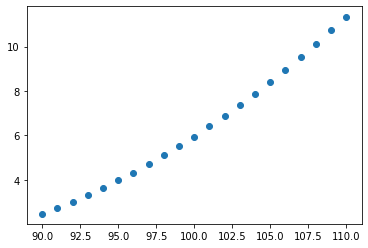

In [17]:
# Define a new GBM
gbm2 = Gbm()

'''=============
Vary Underlying price between 90 and 110
=============='''
underlyingPrice = []      # Array of Underlying values s0 that will be used to plot
optionPrice = []          # Array of Call option prices for associated s0
for i in range(90, 111):  # Iterate from 90 to 110 stepping up by 1 
  gbm2.init_state = i
  callPrice = gbm2.bsm_price(option1)
  underlyingPrice.append(i)
  optionPrice.append(callPrice)

# Print the Plot
plt.scatter(underlyingPrice, optionPrice)
plt.show  

This graph suggests that there is an exponential relationship between Call Option price and price of the underlying asset at time $t=0$, $S_0$ for the fixed strike price $K=\$110$ and underlying price varying from $\$90$ to $\$110$. 


Next we examine the result for values of the underlying asset between $\$110$ and $\$150$.

<function matplotlib.pyplot.show>

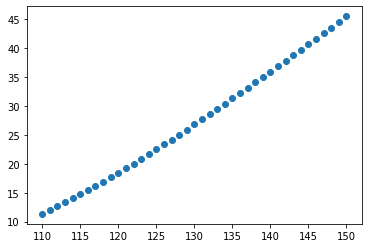

In [18]:
# Define a new GBM
gbm3 = Gbm()

'''=============
Vary Underlying price between 110 and 130
=============='''
underlyingPrice = []        # Array of Underlying values s0 that will be used to plot
optionPrice = []            # Array of Call option prices for associated s0
for i in range(110, 151):  # Iterate from 110 to 130 
  gbm3.init_state = i
  callPrice = gbm3.bsm_price(option1)
  underlyingPrice.append(i)
  optionPrice.append(callPrice)

# Print the plot
plt.scatter(underlyingPrice, optionPrice)
plt.show

This graph suggests that there is a linear relationship between Call Option price and $S_0$, the price of the underlying asset at time $t=0$, for the fixed strike price $K=\$110$ and underlying price varying from $\$110$ to $\$150$. 

Finally, we consider the result when the underlying takes values between $\$50$ and $\$160$.

<function matplotlib.pyplot.show>

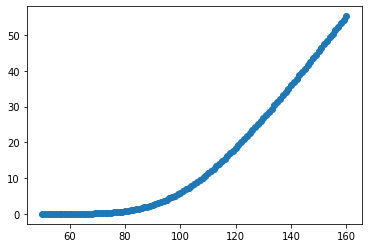

In [19]:
# Define a new GBM
gbm4 = Gbm()

'''=============
Vary Underlying price between 50 and 300
=============='''
underlyingPrice = []      # Array of Underlying values s0 that will be used to plot
optionPrice = []          # Array of Call option prices for associated s0
for i in range(50, 161):  # Iterate from 50 to 160 stepping up by 1 
  gbm4.init_state = i
  callPrice = gbm4.bsm_price(option1)
  underlyingPrice.append(i)
  optionPrice.append(callPrice)

# Print the Plot
plt.scatter(underlyingPrice, optionPrice)
plt.show

This plot seems to be exponential. However, consider the strike price $K=\$110$. The exponential growth in the function seems to happen before the $\$110$ mark, while, as we explored above, the values beyond that show a linear relationship. Note that, intuitively, the probability of the stock reaching and surpassing the strike price decreases as the time 0 price of the stock gets further below $\$110$. This drives the price of the option down. Conversely, if the price of the underlying is greater than the strike, the probability the stock price surpasses the strike becomes higher. Thus, the option price goes up.

Mathematically, we can see this as well:

Recall the formula for the Call option price:
$$C_0 = S_0  \Phi(d_1) - K e^{-rT} \Phi(d_2),$$
The formula for the two $d_i$'s can be substituted in:
$$C_0 = S_0  \Phi\left(\frac{1}{\sigma\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r + \frac{\sigma^2}{2}
          \right)
          \left(
            T-t
          \right)
        \right]\right) - K e^{-rT} \Phi\left(\frac{1}{\sigma\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r - \frac{\sigma^2}{2}
          \right)
          \left(
            T-t
          \right)
        \right]\right),$$

Observe that if $S_0$ is greater than $K$, the expression $\frac{S_0}{K}$ is greater than $1$, so $ln\left(\frac{S_0}{K}\right)$ is positive.
Conversely, if $S_0$ is less than $K$, the expression $ln\left(\frac{S_0}{K}\right)$ is negative. Since $\frac{1}{\sigma\sqrt{(T-t)}}$ is always positive, we know that the positive or negative value obtained from the natural logarithm will directly affect the expression given to the normal CDF. Since the normal CDF is a measure of area based on the limit given to it as an argument, the higher the value of that argument, the higher the total area.
Note also that as the CDF of a random variable, the area given will be less than or equal to $1$. Thus our equation above can again be reduced:
$$C_0 = S_0  p_1 - K e^{-rT} p_2,$$
where $p_1, p_2$ are just some positive probabilities. Observe that $p_1 > p_2$ since $d_1 > d_2$. Consider that $S_0=K+m$ for some $m$:

$$C_0 = S_0  p_1 - K e^{-rT} p_2 = (K+m)  p_1 - K e^{-rT} p_2 =  p_1K + mp_1 - K e^{-rT} p_2 = K(p_1 - e^{-rT} p_2) + mp_1$$
Since $e^{-rT}$ is the time value of money, it is at most $1$. Thus, we have:
$$K(p_1 - e^{-rT} p_2) + mp_1 \leq Kp_1 + mp_1 $$

So, if $m \leq 0$, that is if $S_0 \leq K$, the option price will decrease, while if $m > 0$, that is if $S_0 > K$, the option price will increase.



### Vary Volatility $\sigma$
Next, we will leave the underlying price fixed at  $S_0=\$100$ and vary the volatility, $\sigma$.

First, we vary the volatility from very small, $0.01$ to the standard value we used in the model above, $0.1$.

<function matplotlib.pyplot.show>

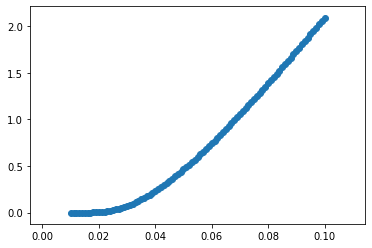

In [26]:
# Define a new GBM
gbm5 = Gbm()

'''=============
Vary Volatility between 0.01 and 0.1
=============='''
volatilities = []           # Array of Underlying values s0 that will be used to plot
optionPrice = []            # Array of Call option prices for associated s0
for i in range(10, 101):    # Iterate from 0.01 to 0.1 stepping up by 0.001 
  j = i / 1000              # Divide by 1000 to get the value we want
  gbm5.vol_ratio = j
  callPrice = gbm5.bsm_price(option1)
  volatilities.append(j)
  optionPrice.append(callPrice)

# Print the plot
plt.scatter(volatilities, optionPrice)
plt.show

This graph seems to imply an exponential trend in the relationship between Volatility and Call option price. 

Next, we consider volatilities in the range $0.1$ to $0.3$.

<function matplotlib.pyplot.show>

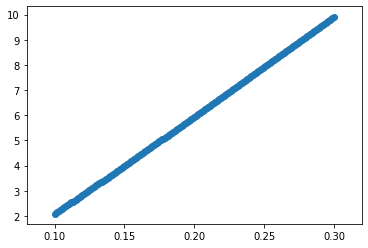

In [27]:
# Define a new GBM
gbm6 = Gbm()

'''=============
Vary Volatility between 0.1 and 0.3
=============='''
volatilities = []           # Array of Underlying values s0 that will be used to plot
optionPrice = []            # Array of Call option prices for associated s0
for i in range(100, 301):    # Iterate from 0.1 to 0.3 stepping up by 0.001 
  j = i / 1000              # Divide by 1000 to get the value we want
  gbm6.vol_ratio = j
  callPrice = gbm6.bsm_price(option1)
  volatilities.append(j)
  optionPrice.append(callPrice)

# Print the plot
plt.scatter(volatilities, optionPrice)
plt.show

This graph seems to imply a linear relationship between Call Option price and Volatility.

Finally, we consider the entire range of volatilities from $0.01$ to $0.3$.

<function matplotlib.pyplot.show>

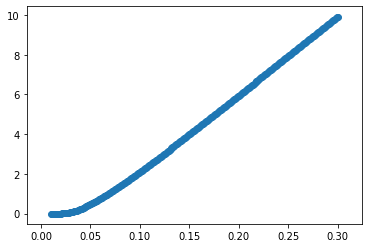

In [28]:
# Define a new GBM
gbm7 = Gbm()

'''=============
Vary Volatility between 0.01 and 0.3
=============='''
volatilities = []           # Array of Underlying values s0 that will be used to plot
optionPrice = []            # Array of Call option prices for associated s0
for i in range(10, 301):  # Iterate from 0.01 to 0.3 stepping up by 0.001 
  j = i / 1000             # Divide by 1000 to get the value we want
  gbm7.vol_ratio = j
  callPrice = gbm7.bsm_price(option1)
  volatilities.append(j)
  optionPrice.append(callPrice)

# Print the plot
plt.scatter(volatilities, optionPrice)
plt.show

The first plot, along with this final one, seems to imply an exponential relationship between Call Option price and Volatility for small values of $\sigma$, that is for $0.01 \leq \sigma \leq 0.05$.
The second plot, along with this final one, seems to imply a linear relationship between the Call Option price and Volatility for $\sigma > 0.05$.

This makes sense intuitively. Our stock at price $S_0=\$100$ varies over time at the rate $\sigma$; essentially, $\sigma$ determines the percent a given stock will change over time. The higher $\sigma$ is, the greater the variation in stock price over time. Thus, in our cases where $\sigma$ is small, there is not much variation in the stock price over time, so the probability that the stock price will be above our strike price $K=\$110$ is small. Thus, the option is not worth very much since in that case its payoff is $\$0$. However, as the volatility increases, the variation of the stock price does as well. That leads to a greater chance that the price of the stock will be greater than the strike value $K$ at expiry. This raises the price of the option since it also raises the Payoff. 

We can examine this mathematically as well:

Again, recall the formula for the Call option price:
$$C_0 = S_0  \Phi(d_1) - K e^{-rT} \Phi(d_2),$$
and the formula for the two $d_i$'s can be substituted in:
$$C_0 = S_0  \Phi\left(\frac{1}{\sigma\sqrt{\left( T - t \right)}}\left[\ln\frac{S_{0}}{K}+\left(r + \frac{\sigma^2}{2}\right)\left(T-t\right)\right]\right) - K e^{-rT} \Phi\left(\frac{1}{\sigma\sqrt{\left( T - t \right)}}\left[\ln\frac{S_{0}}{K}+\left(r - \frac{\sigma^2}{2}\right)\left(T-t\right)\right]\right).$$

Consider the case where $\sigma$ changes: We then have that $\sigma_{new} = \sigma + \hat{\sigma}$ where $\hat{\sigma}$ is the change, positive or negative.
Substituting into the $d_i$'s yields:

$$d_1 = \left(\frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r + \frac{(\sigma + \hat{\sigma})^2}{2}
          \right)
          \left(
            T-t
          \right)
        \right]\right)$$
$$d_2 = \left(\frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r - \frac{(\sigma + \hat{\sigma})^2}{2}
          \right)
          \left(
            T-t
          \right)
        \right]\right),$$
And we can further manipulate the equations, starting with $d_1$:

$$d_1 = \frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r\left(T-t\right) + \left(T-t\right)\frac{\sigma^2 + 2\sigma\hat{\sigma}+\hat{\sigma}^2}{2}
          \right)
        \right]$$

        
$$= \frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r\left(T-t\right) + \left(T-t\right)\frac{\sigma^2}{2} + \left(T-t\right)\frac{2\sigma\hat{\sigma}+\hat{\sigma}^2}{2}
          \right)
        \right]$$

        
$$= \frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r + \frac{\sigma^2}{2} \right)\left(T-t\right) 
            + \left(T-t\right)\frac{2\sigma\hat{\sigma}+\hat{\sigma}^2}{2}
        \right]$$

$$= \frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r + \frac{\sigma^2}{2} \right)\left(T-t\right) 
          \right]
            + \left(\frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}\right)\left(T-t\right)\frac{2\sigma\hat{\sigma}+\hat{\sigma}^2}{2}
        $$

$$= \frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r + \frac{\sigma^2}{2} \right)\left(T-t\right) 
          \right]
            + \left(\frac{\sqrt{\left( T - t \right)}}{(\sigma + \hat{\sigma})}\right)\left({\sigma\hat{\sigma}+\hat{\sigma}^2 - \frac{\hat{\sigma}}{2}}\right)
        $$

        
$$= \frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r + \frac{\sigma^2}{2} \right)\left(T-t\right) 
          \right]
            + \left(\frac{\hat{\sigma}\left(\sigma+\hat{\sigma}\right)\sqrt{\left( T - t \right)}}{(\sigma + \hat{\sigma})}\right) - \frac{\hat{\sigma}\sqrt{\left( T - t \right)}}{2(\sigma + \hat{\sigma})}
        $$

        
$$= \frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r + \frac{\sigma^2}{2} \right)\left(T-t\right) 
          \right]
            + \left(\frac{\hat{\sigma}\sqrt{\left( T - t \right)}}{(\sigma + \hat{\sigma})}\right) - \frac{\hat{\sigma}\sqrt{\left( T - t \right)}}{2(\sigma + \hat{\sigma})}
        $$
        
$$= \frac{1}{(\sigma + \hat{\sigma})\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r + \frac{\sigma^2}{2} \right)\left(T-t\right) + \frac{\hat{\sigma}{\left( T - t \right)}}{2}
          \right]
        $$

So if $\hat{\sigma}$ is positive, the fraction $\frac{1}{(\sigma + \hat{\sigma}) \sqrt{T-t}}$ decreases and the value $\frac{\hat{\sigma}(T-t)}{2}$ is positive. And if $\hat{\sigma}$ is negative, the fraction $\frac{1}{(\sigma + \hat{\sigma}) \sqrt{T-t}}$ increases and the value $\frac{\hat{\sigma}(T-t)}{2}$ is negative.

### Conclusion
